In [1]:
import requests
import pandas

#API Key
newsapi_key = '0a1ccb2c1330478d82d98f40f7833706'

#Topics for query string
query = ['sports', 'data', 'AI', 'food', 'summer']

#Set up empty dataframe
data = pandas.DataFrame(columns = ['TOPIC', 'ARTICLE'])

#Loop through topics
for topic in query:
  #Get URL response and append data to dataframe
  url_response = requests.get(url = 'https://newsapi.org/v2/everything?apiKey=' + newsapi_key + '&q=' + topic)
  topic_articles = url_response.json()['articles']
  topic_dataframe = pandas.DataFrame([[topic, article] for article in topic_articles], columns = ['TOPIC', 'ARTICLE'])
  data = pandas.concat([data, topic_dataframe], ignore_index = True)

In [2]:
#Look at first article pulled from url
data.ARTICLE[0]

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Nathan Ingraham',
 'title': "Acer's latest Chromebook Spin 714 sports a 2K webcam",
 'description': "Acer reliably makes some of the best Chromebooks on the market, and today it's announcing an update to the Chromebook Spin 714 as part of a slew of PC news. Like last year's model, the Chromebook Spin 714 is a premium laptop that's thin (0.7 inches), light (a…",
 'url': 'https://www.engadget.com/acers-latest-chromebook-spin-714-sports-a-2k-webcam-133056810.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/fBALbRCS8o66LBCOF0CknA--~B/Zmk9ZmlsbDtoPTYzMDtweW9mZj0wO3c9MTIwMDthcHBpZD15dGFjaHlvbg--/https://media-mbst-pub-ue1.s3.amazonaws.com/creatr-uploaded-images/2023-04/42cd84d0-df7b-11ed-8ebd-8e97ae325a14.cf.jpg',
 'publishedAt': '2023-04-20T13:30:56Z',
 'content': "Acer reliably makes some of the best Chromebooks on the market, and today it's announcing an update to the Chromebook Spin 714 as part of a slew of PC news. L

In [3]:
#Create additional columns
import datetime
data['PUBLISHED_DATE'] = [datetime.datetime.strptime(article['publishedAt'][:10], '%Y-%m-%d').strftime('%Y-%m-%d') for article in data['ARTICLE']]
data['PUBLISHED_MONTH'] = [datetime.datetime.strptime(article['publishedAt'][:7], '%Y-%m').strftime('%B %Y') for article in data['ARTICLE']]
data['PUBLISHED_YEAR'] = [datetime.datetime.strptime(article['publishedAt'][:4], '%Y').strftime('%Y') for article in data['ARTICLE']]
data['SOURCE'] = [article['source']['name'] for article in data['ARTICLE']]
data['URL'] = [article['url'] for article in data['ARTICLE']]
data['CONTENT'] = [article['content'] for article in data['ARTICLE']]

#Drop ARTICLE column and Fill NA's with empty string
data = data.drop(columns = ['ARTICLE']).fillna('')

In [4]:
import nltk
nltk.download(['stopwords','punkt'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
#Create cleaned articles
import re
stopwords = nltk.corpus.stopwords.words('english')
data['CLEANED_CONTENT'] = [' '.join([word.lower() for word in nltk.word_tokenize(content) if re.match('^[a-z]+$', word.lower()) and not word in stopwords]) for content in data['CONTENT']]

#Drop CONTENT column
data = data.drop(columns = ['CONTENT'])

In [6]:
#Look at dataframe
data

,TOPIC,PUBLISHED_DATE,PUBLISHED_MONTH,PUBLISHED_YEAR,SOURCE,URL,CLEANED_CONTENT
0,sports,2023-04-20,April 2023,2023,Engadget,https://www.engadget.com/acers-latest-chromebo...,acer reliably makes best chromebooks market to...
1,sports,2023-04-14,April 2023,2023,The Verge,https://www.theverge.com/2023/4/14/23683917/ap...,apple tv getting multiview sports streams appl...
2,sports,2023-04-18,April 2023,2023,Engadget,https://www.engadget.com/latest-apple-headset-...,apple reportedly readying wide array apps serv...
3,sports,2023-04-17,April 2023,2023,Engadget,https://www.engadget.com/harry-potter-quidditc...,just like new harry potter game way on monday ...
4,sports,2023-05-05,May 2023,2023,Engadget,https://www.engadget.com/fortnite-is-now-an-ol...,ever wish fortnite skills could lead olympic g...
...,...,...,...,...,...,...,...
495,summer,2023-04-25,April 2023,2023,The Guardian,https://www.theguardian.com/world/gallery/2023...,svalbard norway sits deep within arctic circle...
496,summer,2023-04-27,April 2023,2023,The Guardian,https://www.theguardian.com/uk-news/2023/apr/2...,police continuing search country park near gla...
497,summer,2023-04-14,April 2023,2023,Boing Boing,https://boingboing.net/2023/04/14/sidestep-soa...,we thank sponsor making content possible writt...
498,summer,2023-04-15,April 2023,2023,CNN,https://www.cnn.com/africa/live-news/sudan-arm...,welcome live coverage sudan fighting erupted c...


In [7]:
#Create labeled document vectors
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
topic_vecs = pandas.DataFrame(vec.fit_transform(data['CLEANED_CONTENT']).toarray(), columns = vec.get_feature_names_out())
topic_vecs = pandas.DataFrame(data['TOPIC']).join(topic_vecs)
print('Labeled Count Vectors')
print(topic_vecs)

Labeled Count Vectors
      TOPIC  aberdeen  ability  able  aboard  abuse  academic  accept  \
0    sports         0        0     0       0      0         0       0   
1    sports         0        0     0       0      0         0       0   
2    sports         0        0     0       0      0         0       0   
3    sports         0        0     0       0      0         0       0   
4    sports         0        0     0       0      0         0       0   
..      ...       ...      ...   ...     ...    ...       ...     ...   
495  summer         0        0     0       0      0         0       0   
496  summer         0        0     0       0      0         0       0   
497  summer         0        0     0       0      0         0       0   
498  summer         0        0     0       0      0         0       0   
499  summer         0        0     0       0      0         0       0   

     accepting  access  ...  youre  youth  youtube  youtubers  yoy  yvette  \
0            0       0 

In [8]:
#Write dataframes to CSV file
#Main DataFrame
try:
  import google.colab.files
  print('Writing Main DataFrame to C:/Users/nvidetti/Downloads/Main Data.csv')
  with open('Main Data.csv', 'w') as datafile:
    datafile.writelines(''.join([column + ', ' for column in data.columns]) + '\n')
    i = 0
    while i < len(data):
      datafile.writelines(''.join([data.iloc[i,col] + ', ' for col in range(len(data.columns))]) + '\n')
      i += 1
  datafile.close()
  google.colab.files.download('Main Data.csv')

except:
  main_path = input('Please Enter File Path for Saving Main DataFrame: ')
  print('Writing Main DataFrame to ', main_path)
  with open(main_path, 'w') as datafile:
    datafile.writelines(''.join([column + ', ' for column in data.columns]) + '\n')
    i = 0
    while i < len(data):
      datafile.writelines(''.join([data.iloc[i,col] + ', ' for col in range(len(data.columns))]) + '\n')
      i += 1
  datafile.close()

Writing Main DataFrame to C:/Users/nvidetti/Downloads/Main Data.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
#Write dataframes to CSV file
#Count Vectors
print()
try:
  import google.colab.files
  print('Writing Labeled Count Vectors DataFrame to C:/Users/nvidetti/Downloads/Topic Vectors.csv')
  with open('Topic Vectors.csv', 'w') as datafile:
    datafile.writelines(''.join([column + ', ' for column in topic_vecs.columns]) + '\n')
    i = 0
    while i < len(topic_vecs):
      datafile.writelines(''.join([str(topic_vecs.iloc[i,col]) + ', ' for col in range(len(topic_vecs.columns))]) + '\n')
      i += 1
  datafile.close()
  google.colab.files.download('Topic Vectors.csv')

except:
  vecs_path = input('Please Enter File Path for Saving Labeled Count Vectors DataFrame: ')
  print('Writing Main DataFrame to ', vecs_path)
  with open(vecs_path, 'w') as datafile:
    datafile.writelines(''.join([column + ', ' for column in topic_vecs.columns]) + '\n')
    i = 0
    while i < len(topic_vecs):
      datafile.writelines(''.join([str(topic_vecs.iloc[i,col]) + ', ' for col in range(len(topic_vecs.columns))]) + '\n')
      i += 1
  datafile.close()


Writing Labeled Count Vectors DataFrame to C:/Users/nvidetti/Downloads/Topic Vectors.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#Read Main DataFrame data back in
import google.colab.files
try:
  google.colab.files.upload_file('Main Data.csv')
  with open('Main Data.csv', 'r') as datafile:
    data = datafile.read()
    data = [row.strip()[:-1].split(', ') for row in data.strip().split('\n')]
  datafile.close()
except:
  with open(main_path, 'r') as datafile:
    data = []
    while 1 == 1:
      line = datafile.readline()
      if line != '': data = data.append(line)
      else: break
  datafile.close()

data = pandas.DataFrame(data[1:], columns = data[0])

Saved Main Data.csv to /content/Main Data.csv


In [12]:
#Read Topic Vectors data back in
import google.colab.files
try:
  google.colab.files.upload_file('Topic Vectors.csv')
  with open('Topic Vectors.csv', 'r') as datafile:
    topic_vecs = datafile.read()
    topic_vecs = [row.strip()[:-1].split(', ') for row in topic_vecs.strip().split('\n')]
  datafile.close()
except:
  with open(vecs_path, 'r') as datafile:
    topic_vecs = []
    while 1 == 1:
      line = datafile.readline()
      if line != '': topic_vecs = topic_vecs.append(line)
      else: break
  datafile.close()

topic_vecs = pandas.DataFrame(topic_vecs[1:], columns = topic_vecs[0])

for column in topic_vecs.columns:
  if column != 'TOPIC': topic_vecs[column] = topic_vecs[column].astype(int)

Saved Topic Vectors.csv to /content/Topic Vectors.csv


Generating Word Clouds...


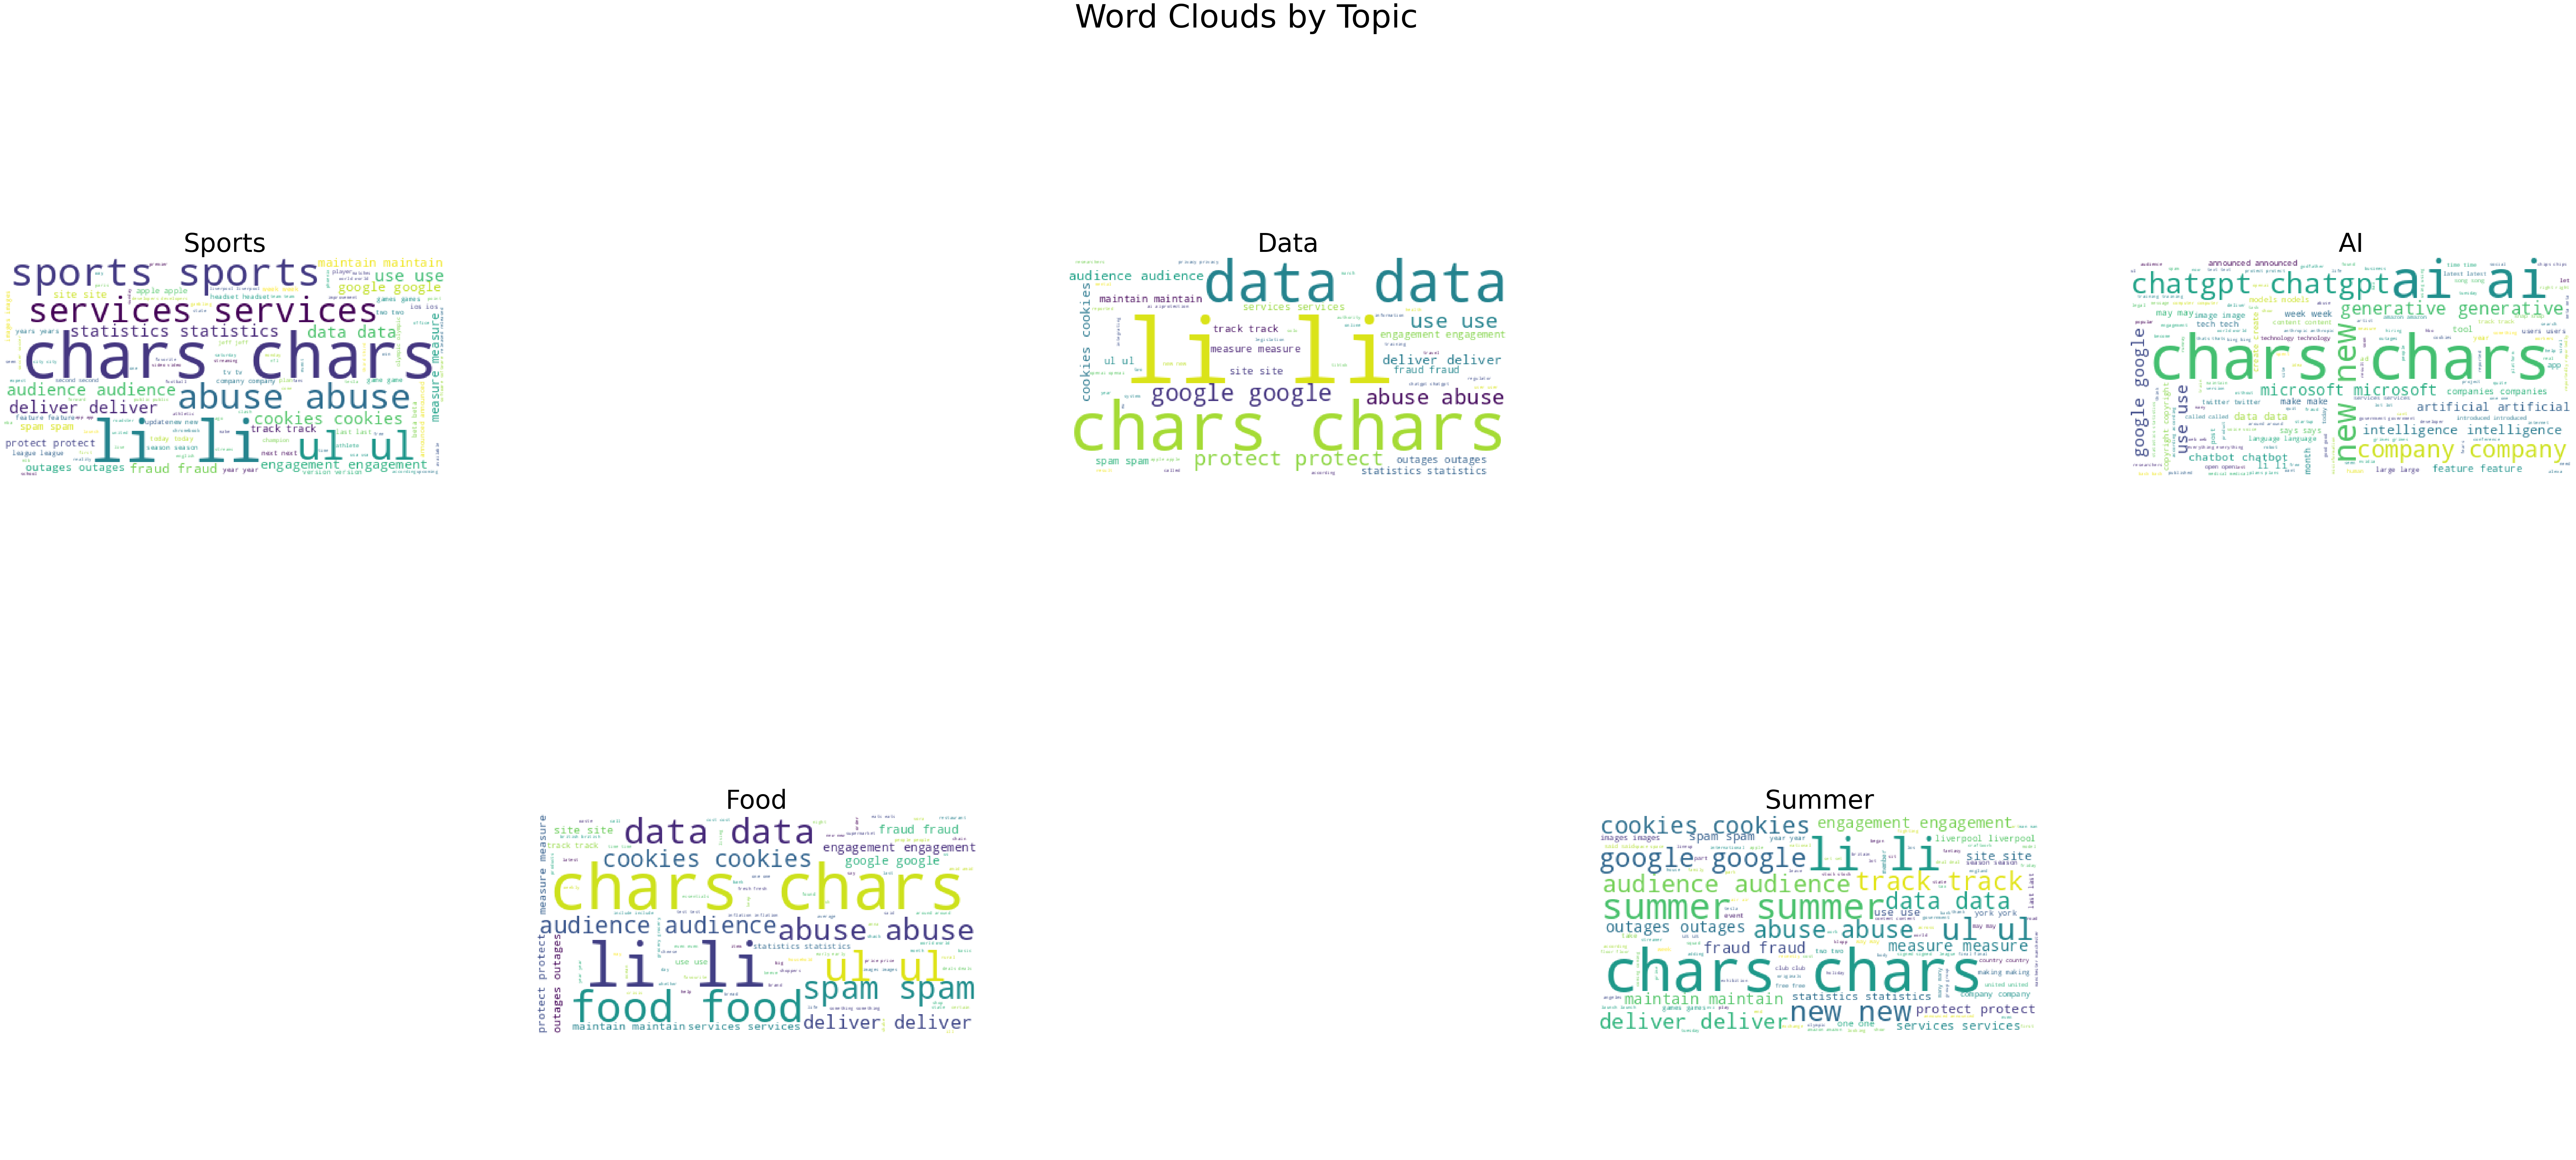

In [13]:
#Generate word clouds
from wordcloud import WordCloud
from matplotlib import pyplot

print('Generating Word Clouds...')

#Subplots to put all word clouds in one figure
fig, plots = pyplot.subplots(2,5, figsize = (100,40))
fig.suptitle('Word Clouds by Topic', fontsize = 70)

#Sports Topic Word Cloud ['sports', 'data', 'AI', 'food', 'summer']
plots[0,0].set_title('Sports', fontsize = 56)
cnt_vecs = topic_vecs[topic_vecs['TOPIC'] == 'sports'].drop(columns = ['TOPIC'])
wordlist = [[word]*sum(cnt_vecs[word]) for word in list(cnt_vecs.columns)]
words = ' '.join([word for sublist in wordlist for word in sublist])
plots[0,0].imshow(WordCloud(background_color= 'white').generate(words))
plots[0,0].axis('off')

#Data Topic Word Cloud
plots[0,2].set_title('Data', fontsize = 56)
cnt_vecs = topic_vecs[topic_vecs['TOPIC'] == 'data'].drop(columns = ['TOPIC'])
wordlist = [[word]*sum(cnt_vecs[word]) for word in list(cnt_vecs.columns)]
words = ' '.join([word for sublist in wordlist for word in sublist])
plots[0,2].imshow(WordCloud(background_color= 'white').generate(words))
plots[0,2].axis('off')

#AI Topic Word Cloud
plots[0,4].set_title('AI', fontsize = 56)
cnt_vecs = topic_vecs[topic_vecs['TOPIC'] == 'AI'].drop(columns = ['TOPIC'])
wordlist = [[word]*sum(cnt_vecs[word]) for word in list(cnt_vecs.columns)]
words = ' '.join([word for sublist in wordlist for word in sublist])
plots[0,4].imshow(WordCloud(background_color= 'white').generate(words))
plots[0,4].axis('off')

#Food Topic Word Cloud
plots[1,1].set_title('Food', fontsize = 56)
cnt_vecs = topic_vecs[topic_vecs['TOPIC'] == 'food'].drop(columns = ['TOPIC'])
wordlist = [[word]*sum(cnt_vecs[word]) for word in list(cnt_vecs.columns)]
words = ' '.join([word for sublist in wordlist for word in sublist])
plots[1,1].imshow(WordCloud(background_color= 'white').generate(words))
plots[1,1].axis('off')

#Summer Topic Word Cloud
plots[1,3].set_title('Summer', fontsize = 56)
cnt_vecs = topic_vecs[topic_vecs['TOPIC'] == 'summer'].drop(columns = ['TOPIC'])
wordlist = [[word]*sum(cnt_vecs[word]) for word in list(cnt_vecs.columns)]
words = ' '.join([word for sublist in wordlist for word in sublist])
plots[1,3].imshow(WordCloud(background_color= 'white').generate(words))
plots[1,3].axis('off')

plots[0,1].axis('off')
plots[0,3].axis('off')
plots[1,0].axis('off')
plots[1,2].axis('off')
plots[1,4].axis('off')


pyplot.show()

In [14]:
#Create Train and Test Sets
from sklearn.model_selection import train_test_split
topic_train, topic_test = train_test_split(topic_vecs, train_size = 0.7)

#Remove labels from test sets
topic_test_labels = topic_test[['TOPIC']]
topic_test = topic_test.drop(columns = ['TOPIC'])

#Multinomial Naive Bayes
import sklearn.naive_bayes
from sklearn.metrics import confusion_matrix
MNB = sklearn.naive_bayes.MultinomialNB()

topic_model = MNB.fit(topic_train.drop(columns = ['TOPIC']), topic_train['TOPIC'])
topic_prediction = MNB.predict(topic_test)
topic_conf = confusion_matrix(topic_test_labels, topic_prediction)
print('TOPIC MODEL CONFUSION MATRIX')
print(topic_conf)
topic_conf_diag = sum([topic_conf[i][j] for i in range(len(topic_conf)) for j in range(len(topic_conf[i])) if i == j])
print()
print('TOPIC MODEL ACCURACY:', round((topic_conf_diag / sum([sum(sublist) for sublist in topic_conf])) * 100, 2), '%')

TOPIC MODEL CONFUSION MATRIX
[[30  1  2  1  1]
 [ 6 24  0  0  2]
 [ 3  7 14  3  4]
 [ 3  6  1  9  8]
 [ 3  3  0  2 17]]

TOPIC MODEL ACCURACY: 62.67 %
